# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Ознакомление с общей информацией.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

#### Изучаем общую информацию

In [3]:
pd.set_option('display.max_columns', None)
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Строим гистрограмму для всех столбцов

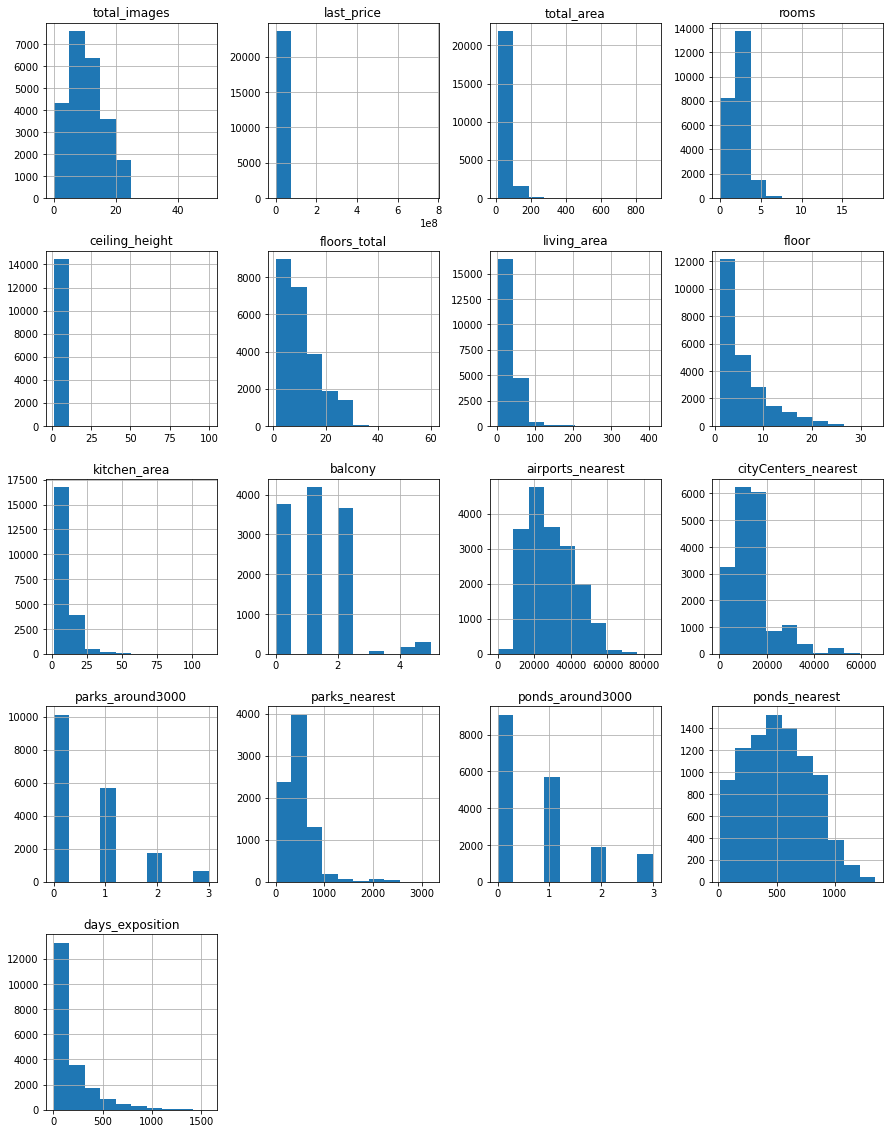

In [5]:
data.hist(figsize=(15, 20))
plt.show()

#### Промежуточный вывод

При первоначальном знакомстве с данными выявлены следующие проблемы:  
- пропуски в столбцах: высота потолков, всего этажей в доме, жилая площадь, аппартаменты, площадь кухни, число балконов, название населенного пункта, расстояние до аэропорта, расстояние до центра города, число парков в радиусе 3 км., растояние до парка,число водоемов в радиусе 3 км., расстояние до водоема, сколько дней было размещено объявление.  
- название столбца cityCenters_nearest не соответствует общему правилу применяемому к заголовкам.  
- типы данных в столбцах не соответствуют логическим значениям: last_price, first_day_exposition, floors_total, is_apartment, balcony.

### Предобработка данных

#### Найдем пропущенные значения в столбцах

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Удаляем строки с пропусками в столбцах floors_total и locality_name. Таких строк не много и они не повлияют на общую картину.

In [7]:
data = data.dropna(subset=['floors_total', 'locality_name'])

#### Вставляем пропущенные значения 

In [8]:
data['is_apartment'] = data['is_apartment'].fillna('False')

In [9]:
data['balcony'] = data['balcony'].fillna(0)

#### Проверяем значения в столбцах, с которыми работали

In [10]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пропуски в столбце 'is_apartment' скорее всего связаны с тем, что рассматриваемые объекты не являются аппартаментами и мы можем заменить значения NaN на False.<br>
Пропуски в столбце 'balcony' могут быть связаны связаны с тем, что рассматриваемые объекты не имеют балконов.<br>
В столбцах floors_total, locality_name, ceiling_height, living_area и kitchen_area скорее всего просто не указали данные.<br>
Можно предположить, что в нижеперечисленных столбцах нет данных в связи с тем, что отсутствует данное условие.<br>
airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest.

#### Приведем названия столбцов к одному виду

In [11]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

#### Заменяем типы данных

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [13]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [14]:
data['last_price'] = data['last_price'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

last_price - цена квартиры измеряется в целых числах<br>
first_day_exposition - должен быть формат даты для удобства работы<br>
floors_total - количество этажей - целое число<br>
is_apartment - апартаменты или нет - проще чтобы было булево значение<br>
balcony - количество балконов - целое число

#### Изучаем уникальные значения

In [16]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [17]:
len(data['locality_name'].unique())

364

In [18]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок ', 'деревня ', 'коттеджный поселок ', 'поселок городского типа ', 
            'посёлок городского типа', 'поселок при железнодорожной станции ',
            'поселок станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ',
            'село ', 'поселок '], '', regex=True)
)

In [19]:
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [20]:
len(data['locality_name'].unique())

305

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метра

In [21]:
data['price_for_1meter'] = (data['last_price'] / data['total_area']).round(2)

#### День недели публикации объявления

In [22]:
data['day_publication'] = data['first_day_exposition'].dt.weekday

#### Месяц публикации объявления

In [23]:
data['month_publication'] = data['first_day_exposition'].dt.month

#### Год публикации объявления

In [24]:
data['year_publication'] = data['first_day_exposition'].dt.year

#### Тип этажа квартиры

In [25]:
def x_type_floor(row):
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row['floors_total']:
        return "последний"
    else:
        return "другой"

In [26]:
data['type_floor'] = data.apply(x_type_floor, axis=1)

#### Расстояние до центра города в километрах

In [27]:
data['distance_to_the_center'] = (data['city_centers_nearest'] / 1000).round()

#### Выводим результат

In [28]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1meter,day_publication,month_publication,year_publication,type_floor,distance_to_the_center
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,True,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,True,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,True,False,False,9.10,0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,True,False,False,14.40,1,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,True,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0


### Проведите исследовательский анализ данных

#### Изучаем данные общей площади

In [29]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

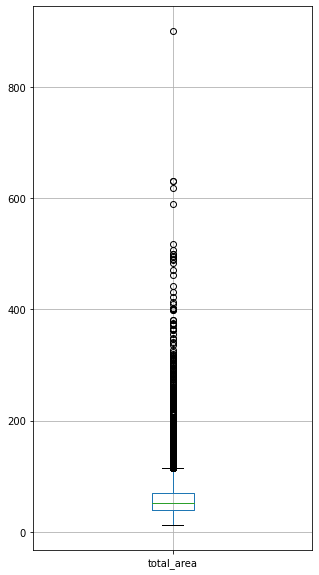

In [30]:
data.boxplot(column='total_area', figsize=(5,10))

In [31]:
data.query('total_area > 150')['total_area'].count()

561

In [32]:
data.query('total_area < 18')['total_area'].count()

15

In [33]:
data.drop(index=data.query('total_area > 550').index, inplace=True)

<AxesSubplot:>

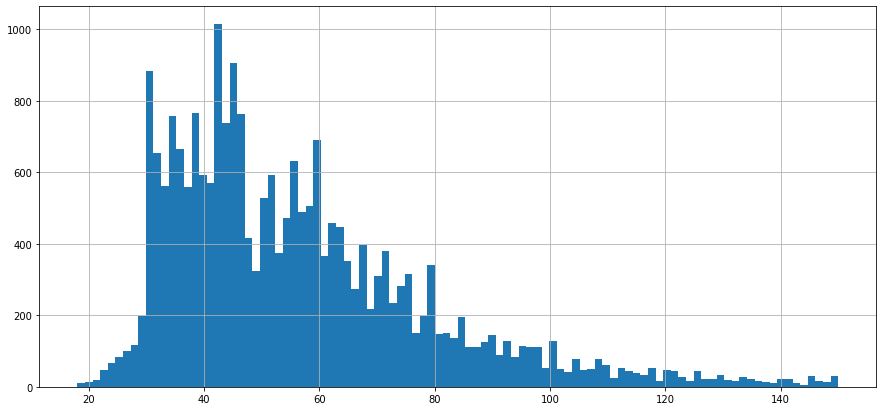

In [34]:
data['total_area'].hist(bins=100, range=(18, 150), figsize=(15,7))

Наибольшее количество квартир с общей площадью примерно 42-44 кв.м..<br>
Значения до 18 кв.м и от 150 кв.м. мы отсекли.<br>
Данные в которых общая площадь больше 550 кв.м. мы удалили

#### Изучаем данные жилой площади

In [35]:
data['living_area'].describe()

count    21696.000000
mean        34.396692
std         21.610299
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        347.500000
Name: living_area, dtype: float64

<AxesSubplot:>

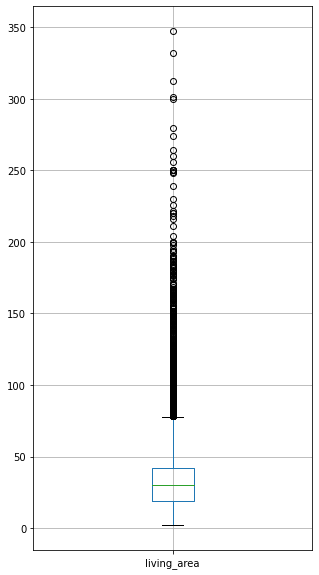

In [36]:
data.boxplot(column='living_area', figsize=(5,10))

In [37]:
data.query('living_area > 80')['living_area'].count()

679

In [38]:
data.query('living_area < 10')['living_area'].count()

25

In [39]:
data.drop(index=data.query('living_area <= 5').index, inplace=True)

<AxesSubplot:>

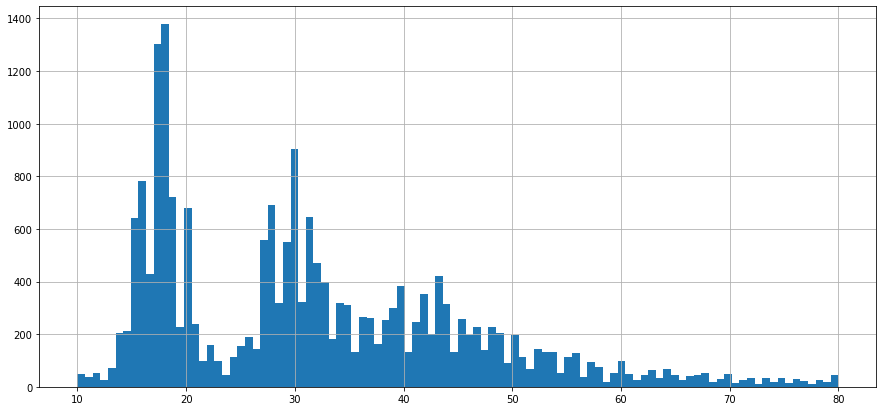

In [40]:
data['living_area'].hist(bins=100, range=(10, 80), figsize=(15, 7))

Наибольшее количество квартир с жилой площадью примерно 17-18 кв.м.<br>
Значения до 10 кв.м и от 80 кв.м. мы отсекли.<br>
Данные в которых жилая площадь меньше или равно 5 кв.м. мы удалили

#### Изучаем данные площади кухни

In [41]:
data['kitchen_area'].describe()

count    21335.000000
mean        10.546323
std          5.804099
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

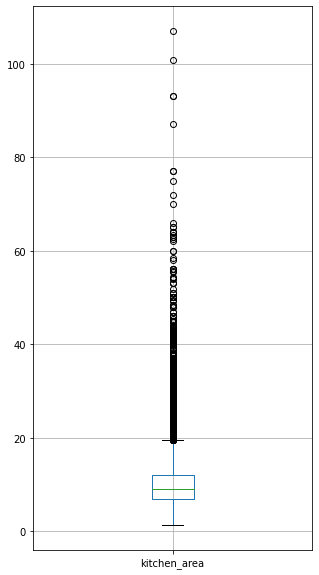

In [42]:
data.boxplot(column='kitchen_area', figsize=(5,10))

In [43]:
data.query('kitchen_area > 20')['kitchen_area'].count()

1011

In [44]:
data.query('kitchen_area < 4')['kitchen_area'].count()

28

In [45]:
data.drop(index=data.query('kitchen_area < 4').index, inplace=True)

In [46]:
data.drop(index=data.query('kitchen_area >= 60').index, inplace=True)

<AxesSubplot:>

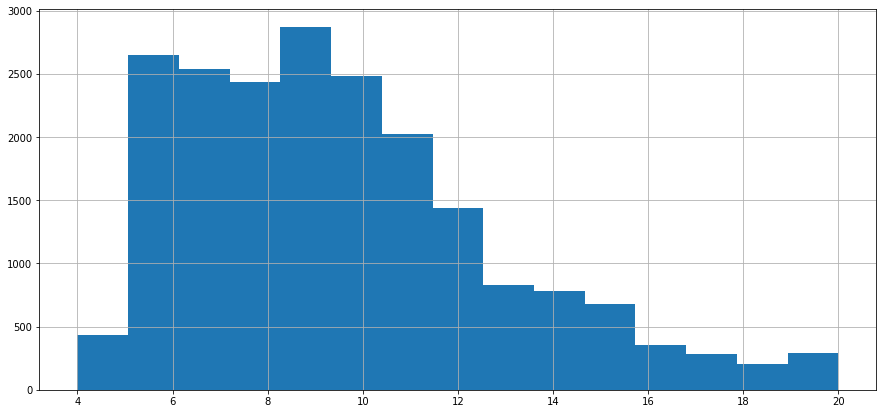

In [47]:
data['kitchen_area'].hist(bins=15, range=(4, 20), figsize=(15, 7))

Наибольшее количество кухонь с площадью 5-11 кв.м.<br>
Значения до 4 кв.м и от 20 кв.м. мы отсекли.<br>
Данные в которых площадь кухни меньше 4 и больше или равно 60 кв.м. мы удалили

#### Изучаем данные цен объектов

In [48]:
data['last_price'].describe()

count    2.350400e+04
mean     6.443887e+06
std      1.009476e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.635500e+06
75%      6.755720e+06
max      7.630000e+08
Name: last_price, dtype: float64

Прошу подсказать как здесь вывести числа в нормальном формате?

In [49]:
data.drop(index=data.query('last_price > 1e+08').index, inplace=True)

<AxesSubplot:>

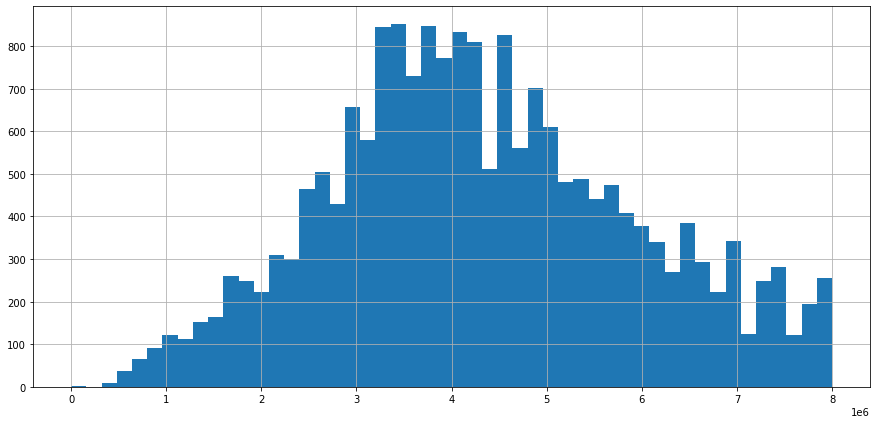

In [50]:
data['last_price'].hist(bins=50, figsize=(15, 7), range=(0, 8e+06))

Наибольшее количество объектов с ценой примерно 3.7 млн.

#### Изучаем данные по количеству комнат

In [51]:
data['rooms'].describe()

count    23475.000000
mean         2.065048
std          1.065897
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

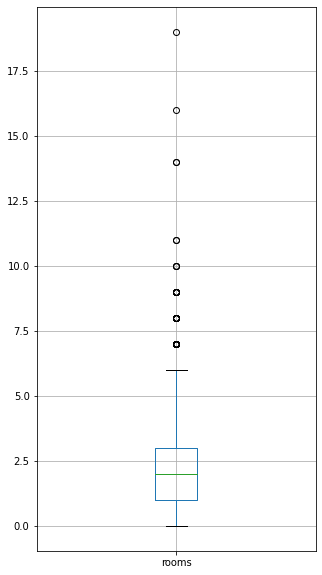

In [52]:
data.boxplot(column='rooms', figsize=(5,10))

In [53]:
data.query('rooms > 7')['rooms'].count()

27

In [54]:
data.drop(index=data.query('rooms > 7').index, inplace=True)

<AxesSubplot:>

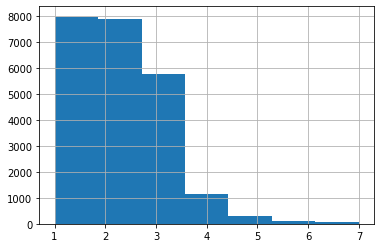

In [55]:
data['rooms'].hist(bins=7, range=(1, 7))

Наибольшее количество объектов с 1 и 2 комнатами.<br>
Значения 0 комнат и от 7 комнат мы отсекли.<br>
Данные в которых количество комнат больше 7 мы удалили

#### Изучаем данные по высоте потолков 

In [56]:
data['ceiling_height'].describe()

count    14403.000000
mean         2.768547
std          1.264023
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [57]:
data = data.replace({'ceiling_height':{25:2.5, 32:3.2}})

In [58]:
data['ceiling_height'].describe()

count    14403.000000
mean         2.753612
std          1.112974
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

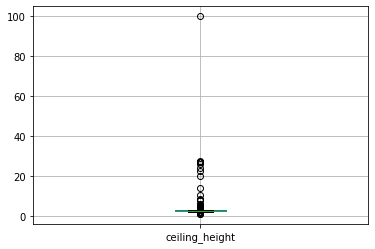

In [59]:
data.boxplot(column='ceiling_height')

In [60]:
data.query('ceiling_height < 2.5')['ceiling_height'].count()

72

In [61]:
data.query('ceiling_height > 3.2')['ceiling_height'].count()

771

In [62]:
data.drop(index=data.query('ceiling_height > 6').index, inplace=True)

<AxesSubplot:>

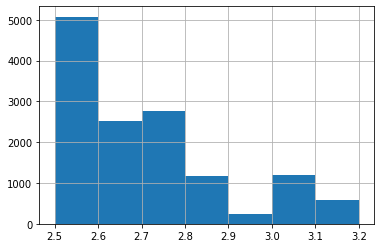

In [63]:
data['ceiling_height'].hist(bins=7, range=(2.5, 3.2))

Наибольшее количество объектов с высотой потолка 2.5м.<br>
Значения до 2.5м. и от 3.2м. мы отсекли.<br>
Значения 25, 32 перевели в 2.5, 3.2<br>
Данные в которых высота потолков больше 6м. мы удалили

#### Изучаем данные по типу этажа квартиры

<AxesSubplot:>

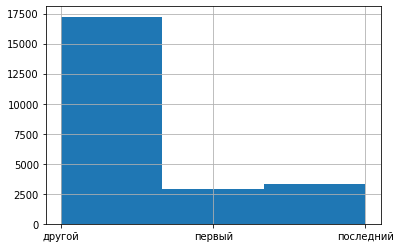

In [64]:
data['type_floor'].hist(bins=3)

Первых и последних этажей в продаже примерно одинаковое количество 2700-3000 ед.

#### Изучаем данные по общему количеству этажей в доме

In [65]:
data['floors_total'].describe()

count    23428.000000
mean        10.689474
std          6.592305
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

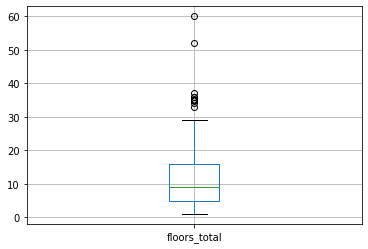

In [66]:
data.boxplot(column='floors_total')

In [67]:
data.query('floors_total > 28')['floors_total'].count()

32

In [68]:
data.drop(index=data.query('floors_total > 30').index, inplace=True)

<AxesSubplot:>

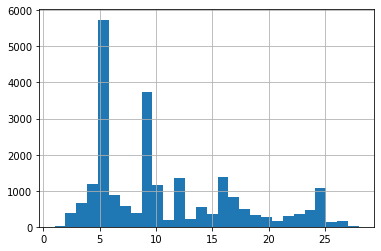

In [69]:
data['floors_total'].hist(bins=28, range=(1, 28))

Наибольшее количество объектов в продаже находятся в 5-и этажных домах<br>
Данные в которых общее число этажей больше 30 мы удалили

#### Изучаем данные по расстоянию до центра города в метрах

In [70]:
data['city_centers_nearest'].describe()

count    17910.000000
mean     14220.895645
std       8609.535353
min        181.000000
25%       9289.000000
50%      13114.000000
75%      16283.750000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

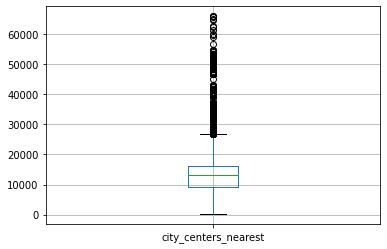

In [71]:
data.boxplot(column='city_centers_nearest')

In [72]:
data.query('city_centers_nearest > 40000')['city_centers_nearest'].count()

298

<AxesSubplot:>

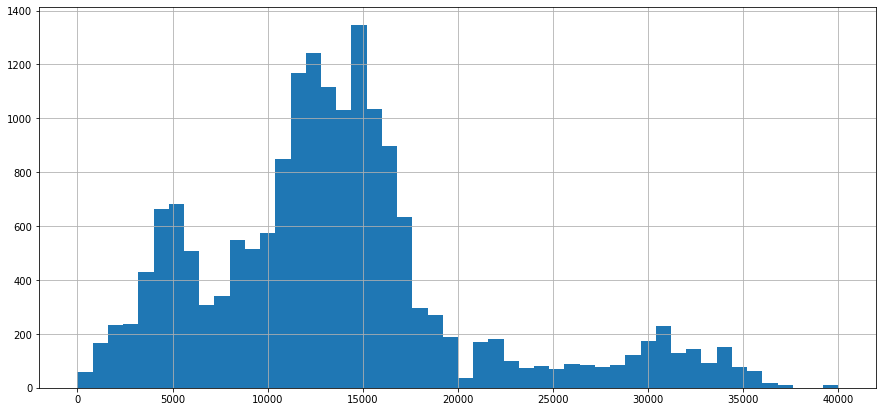

In [73]:
data['city_centers_nearest'].hist(bins=50, range=(0, 40000), figsize=(15, 7))

Наибольшее количество объектов в продаже находятся в 11-16 км. от центра

#### Изучаем данные по расстоянию до ближайшего парка

In [74]:
data['parks_nearest'].describe()

count    7950.000000
mean      490.840503
std       341.734776
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

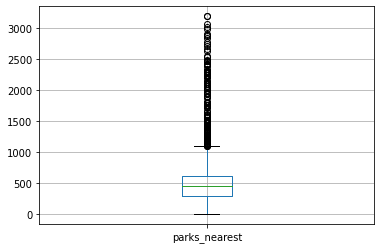

In [75]:
data.boxplot(column='parks_nearest')

In [76]:
data.query('parks_nearest > 1200')['parks_nearest'].count()

268

<AxesSubplot:>

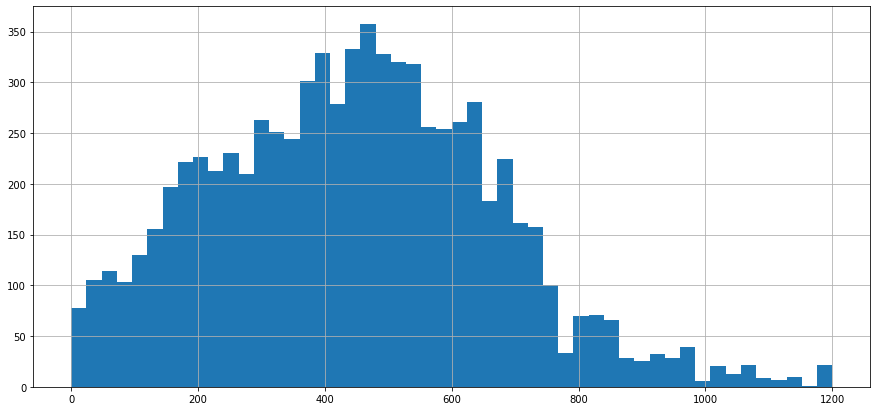

In [77]:
data['parks_nearest'].hist(bins=50, range=(0, 1200), figsize=(15, 7))

Наибольшее количество объектов в продаже находятся в 500 м. от парка

#### Изучаем скорость продажи квартиры

In [78]:
data['days_exposition'].describe()

count    20252.000000
mean       180.285256
std        219.391491
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

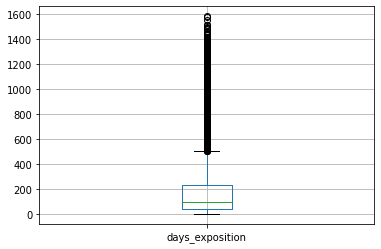

In [79]:
data.boxplot(column='days_exposition')

<AxesSubplot:>

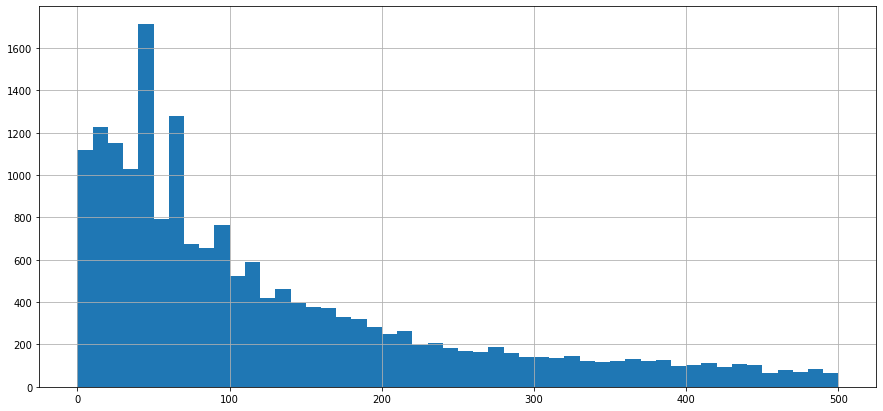

In [80]:
data['days_exposition'].hist(bins=50, range=(0, 500), figsize=(15, 7))

In [81]:
data['days_exposition'].value_counts()

45.0      875
60.0      538
7.0       229
30.0      208
90.0      198
         ... 
818.0       1
969.0       1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1136, dtype: int64

Чаще всего квартиры продаются на 45 и 60 день.<br>
Быстрыми продажами считаются продажи с 1 по 45 день<br>
Необычно долгими считаются примерно после 500 дня

#### Изучение зависимости цены от общей площади

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

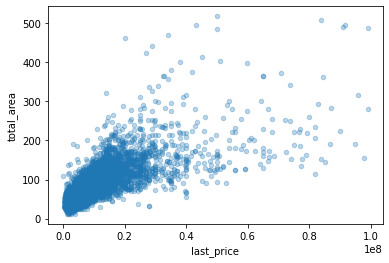

In [82]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)

In [83]:
data['last_price'].corr(data['total_area'])

0.7674946490466796

На данном графике мы можем проследить зависимость цены от общей площади квартиры

#### Изучение зависимости цены от жилой площади

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

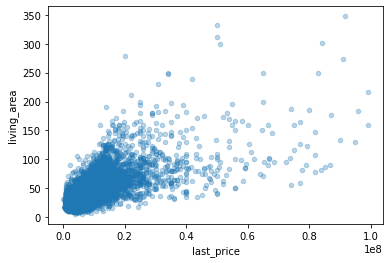

In [84]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3)

In [85]:
data['last_price'].corr(data['living_area'])

0.684818010658234

На данном графике мы можем проследить зависимость цены от жилой площади квартиры

#### Изучение зависимости цены от площади кухни

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

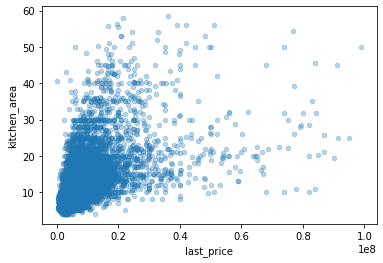

In [86]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3)

In [87]:
data['last_price'].corr(data['kitchen_area'])

0.5704063623197229

На данном графике мы можем проследить зависимость цены от площади кухни в квартире, но меньшую чем в случаях выше

#### Изучение зависимости цены от количества комнат

<AxesSubplot:xlabel='rooms'>

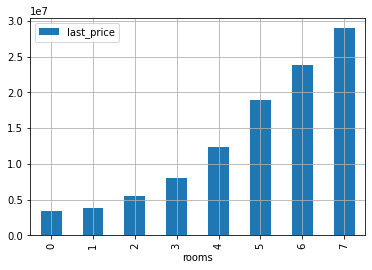

In [88]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, kind='bar')

Чем больше комнат, тем больше цена - зависимость прослеживается

#### Изучение зависимости цены от этажа, на котором расположена квартира

<AxesSubplot:xlabel='type_floor'>

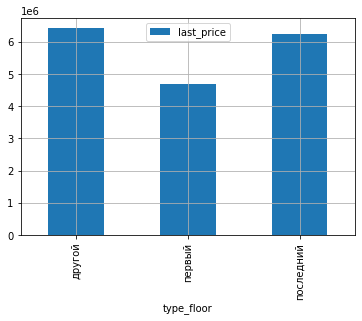

In [89]:
data.pivot_table(index='type_floor', values='last_price').plot(grid=True, kind='bar')

На первом и последнем этажах стоимость квартир ниже

#### Изучение зависимости цены от даты размещения

<AxesSubplot:xlabel='day_publication'>

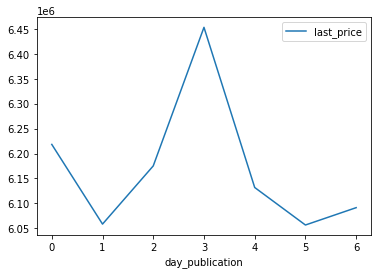

In [90]:
data.pivot_table(index='day_publication', values='last_price').plot()

Дороже всего выставлялись квартиры в продажу по четвергам.  
Дешевле всего по вторникам и субботам

<AxesSubplot:xlabel='month_publication'>

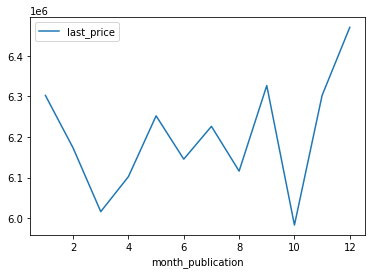

In [91]:
data.pivot_table(index='month_publication', values='last_price').plot()

Дороже всего выставлялись квартиры в продажу в декабре.  
Дешевле всего в октябре

<AxesSubplot:xlabel='year_publication'>

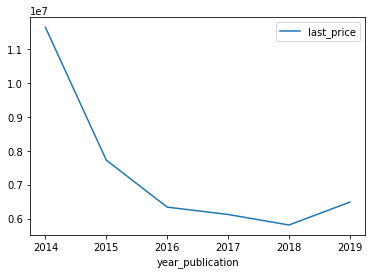

In [92]:
data.pivot_table(index='year_publication', values='last_price').plot()

С 2014 года и до 2018 цены на квартиры падали, начиная с 2018 цены начали расти.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [93]:
top_city = data.pivot_table(index='locality_name', values='price_for_1meter', aggfunc=['count', 'mean'])
top_city.columns = ['count', 'mean']
top_city.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15503,113409.126795
Мурино,581,85923.143167
Кудрово,470,95260.846128
Шушары,439,78551.344647
Всеволожск,398,68654.473970
Пушкин,365,102880.118603
Колпино,337,75333.295816
Парголово,327,90175.913089
Гатчина,307,68746.146515


Самая высокая стоимость кв. м. в Санкт-Петербурге<br>
Самая низкая стоимость кв. м. в Выборге

#### Зависимость стоимости объектов от расстояния до центра города

<AxesSubplot:xlabel='distance_to_the_center'>

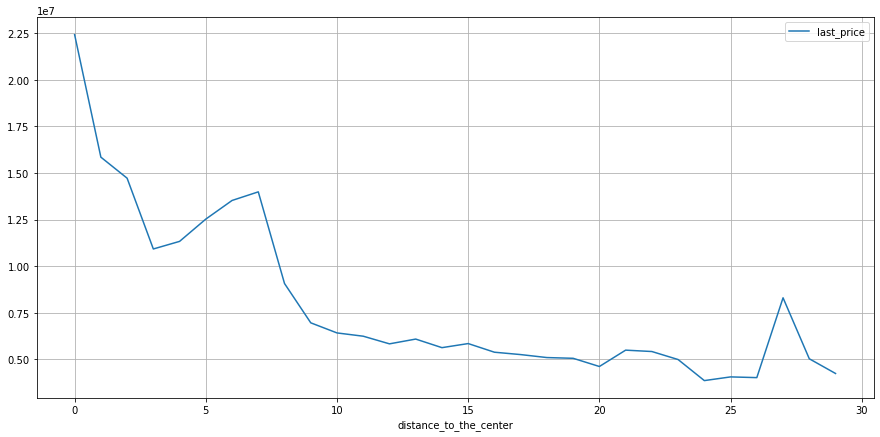

In [94]:
(
data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_to_the_center', values='last_price', aggfunc='mean')
    .plot(figsize=(15,7), grid=True)
)

На основании графика можно сказать, что чем ближе объект находится к центру, тем он дороже. На расстоянии от 3 до 7 км до центра прослеживается увеличение стоимости, возможно это связано с различными престижными районами, которые отличаются в цене.

### Общий вывод

На входе была получена таблица с объявлениями о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет.<br>
Проанализировав таблицу, выяснились некоторые проблемы, которые требовалось исправить, а именно:<br>
    - в таблице есть пропуски в столбцах: высота потолков, всего этажей в доме, жилая площадь, аппартаменты, площадь кухни, число балконов, название населенного пункта, расстояние до аэропорта, расстояние до центра города, число парков в радиусе 3 км., растояние до парка,число водоемов в радиусе 3 км., расстояние до водоема, сколько дней было размещено объявление.<br>
    - название столбца cityCenters_nearest не соответствует общему правилу применяемому к заголовкам,<br> 
    - типы данных в столбцах не соответствовали логическим значениям: last_price, first_day_exposition, floors_total, is_apartment, balcony.<br>
    - выявлены неявные дубликаты в столбце locality_name<br>
<br>
На этапе обработки данных пропуски в столбцах floors_total и locality_name были удалены в связи с небольшим количеством таких строк<br>
В столбцах is_apartment и balcony данных заменены на False и 0. Если столбец с аппартаментами не заполнен, значит можно предположить, что объект не является ими. Если не заполнен столбец с балконом, можно предположить, что его нет.<br>
В остальных стобцах скорее всего забыли указать данные, либо такие условия не соблюдаются. Таких значений много, поэтому их не удаляем.<br>
Название столбца cityCenters_nearest приведено к стандартному виду.<br>
Типы данных в столбцах last_price, first_day_exposition, floors_total, is_apartment, balcony приведен к логическому виду.<br>
Неявные дубликаты в столбце locality_name приведены к единому виду.<br>
<br>
Для дальнейшего построения таблиц и проведения расчетов, были добавлены следующие столбцы: Цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах.<br>
Далее был проведен анализ данных с помощью графика boxplot и гистограммы.<br>
После анализа данных выяснилось, что необходимо очистить данные от выбросов, либо от сверхмалых значений.<br>
Основываясь на графики можно сделать следующие выводы:<br>
    - наибольшее количество квартир в продаже с общей площадью около 42-44 кв.м.<br>
    - наибольшее количество квартир в продаже с жилой площадью около 17-18 кв.м.<br>
    - наибольшее количество объектов с ценой примерно 3.7 млн.<br>
    - наибольшее количество объектов с 1 и 2 комнатами.<br>
    - наибольшее количество объектов с высотой потолка 2.5м.<br>
    - наибольшее количество объектов в продаже находятся в 5-и этажных домах.<br>
    - наибольшее количество объектов в продаже находятся в 11-16 км. от центра.<br>
    - наибольшее количество объектов в продаже находятся в 500 м. от парка.<br>
    - чаще всего квартиры продаются на 45 и 60 день. Быстрыми продажами считаются продажи с 1 по 45 день. Необычно долгими считаются примерно после 500 дня.<br>
    - на первом и последнем этажах стоимость квартир ниже.<br>
Самая большая корреляция цены выявлена с параметром общей площади объекта на основании коэффициента Пирсона - 0.77<br>
В топ 3 по количеству объявлений входят следующие города (со средней стоимостью квадратного метра): Санкт-Петербург (113409), Мурино (85923), Кудрово (95260).<br>
Самая большая стоимость объектов за квадратный метр входящих в топ 10 по количеству объявлений у Санкт-Петербурга - 113409 средняя стоимость.
Самая низкая стоимость объектов за квадратный метр входящих в топ 10 по количеству объявлений у Выборга - 58142 средняя стоимость.